# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Bitcoin’s recent recovery has a lot to do with this.  The larger market has tried to understand the value of Bitcoin over the past few years. While many usually fixate on its market price as an asset, others derive something more fundamental such as Bitcoin facilitating financial freedom. Keeping in line with that, the network of Bitcoin i.e the blockchain itself, is equally important. Over [&#8230;] ... [| Skaityti daugiau](https://ambcrypto.com/bitcoins-recent-recovery-has-a-lot-to-do-with-this/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Alberta parents question safety of sending children to school with no COVID-19 pandemic restrictions | CBC News.  Alberta parents are questioning the safety of sending unvaccinated children back to school without pandemic restrictions in place. On Aug. 16, mask mandates on transit, will be lifted and isolation will no longer be required for the majority of positive COVID… ... [| Skaityti daugiau](http://www.cbc.ca/news/canada/edmonton/alberta-parents-question-safety-of-sending-children-to-school-with-no-covid-19-pandemic-restrictions-1.6123396) 

### Kainų kaita pandemijos metu

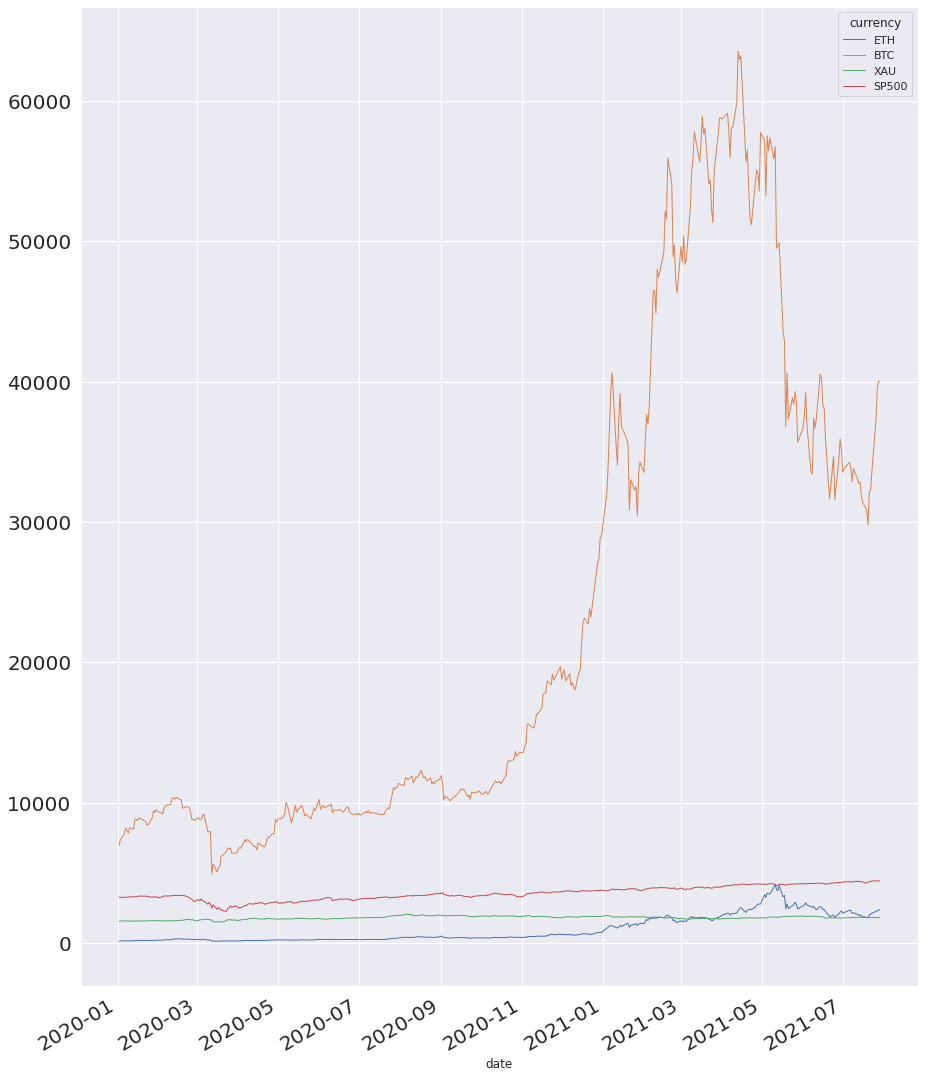

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.889480,0.209696,0.857939
BTC,0.889480,1.000000,0.143384,0.819798
XAU,0.209696,0.143384,1.000000,0.384704
SP500,0.857939,0.819798,0.384704,1.000000


In [8]:
#hide ### Koreliacijos matrica.

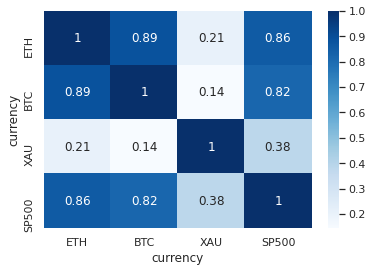

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')